In [1]:
import pandas as pd
pd.options.display.max_columns = 100

In [2]:
xls = pd.ExcelFile("./data/GYD_growth_rate_supp.xlsx")
display(len(xls.sheet_names), xls.sheet_names)

24

['0.2% Glycerol 1500uL (10%) - 1',
 '0.2% Glycerol 1500uL (10%) - 2',
 '0.2% Glycerol 1500uL (10%) - 3',
 '0.2% Glycerol 1500uL (10%) - 4',
 '0.2% Glycerol 1500uL (10%) - 5',
 '0.2% Glycerol 1500uL (10%) - 6',
 '0.2% Glycerol 150uL (1%) - 1',
 '0.2% Glycerol 150uL (1%) - 2',
 '0.2% Glycerol 150uL (1%) - 3',
 '0.2% Glycerol 150uL (1%) - 4',
 '0.2% Glycerol 150uL (1%) - 5',
 '0.2% Glycerol 150uL (1%) - 6',
 '0.2% Glycerol 15uL (0.1%) - 1',
 '0.2% Glycerol 15uL (0.1%) - 2',
 '0.2% Glycerol 15uL (0.1%) - 3',
 '0.2% Glycerol 15uL (0.1%) - 4',
 '0.2% Glycerol 15uL (0.1%) - 5',
 '0.2% Glycerol 15uL (0.1%) - 6',
 '0.2% Glycerol 1.5uL (0.01%) - 1',
 '0.2% Glycerol 1.5uL (0.01%) - 2',
 '0.2% Glycerol 1.5uL (0.01%) - 3',
 '0.2% Glycerol 1.5uL (0.01%) - 4',
 '0.2% Glycerol 1.5uL (0.01%) - 5',
 '0.2% Glycerol 1.5uL (0.01%) - 6']

According to the above list of file names, don't have ALE 34 and 35, therefore can just ignore them for this study.  
Also, there are only 24 ALEs given in this sheet. Missing the growth values for all ALEs of bottleneck 0.001% (ALEs 25-30)

In [3]:
pd.read_excel(xls, sheet_name="0.2% Glycerol 1500uL (10%) - 5").iloc[-1]

Cumulative Cells Divisions    6.570885e+12
Growth Rate (1/hr)            5.365895e-01
Name: 192, dtype: float64

In [4]:
import numpy as np

In [5]:
growth_ALE_d = dict()
ALE_num_cnt = 0
for s_n in xls.sheet_names:
    ALE_num_cnt += 1
    growth_ALE_d[ALE_num_cnt] = np.max(pd.read_excel(xls, sheet_name=s_n)["Growth Rate (1/hr)"])
growth_ALE_d

{1: 0.674169068960559,
 2: 0.644183610082965,
 3: 0.680300446642856,
 4: 0.643386367872683,
 5: 0.670348694975349,
 6: 0.648173296099042,
 7: 0.635271357548991,
 8: 0.632921156879595,
 9: 0.625324268768797,
 10: 0.627430976082202,
 11: 0.630901670852765,
 12: 0.685405343776978,
 13: 0.618901246041582,
 14: 0.619803383370745,
 15: 0.621341613341093,
 16: 0.640683526942214,
 17: 0.621342268189824,
 18: 0.618885001318581,
 19: 0.507389593117402,
 20: 0.481307756342433,
 21: 0.603917533696523,
 22: 0.612000733375816,
 23: 0.596159748944704,
 24: 0.615043939321888}

ALE 19 and 20 (passage vol 0.01%) are state 2. Everything else is state 3.

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
sns.set_context("paper")
sns.set_style("ticks")

In [7]:
sorted(growth_ALE_d.values(), reverse=True)

[0.685405343776978,
 0.680300446642856,
 0.674169068960559,
 0.670348694975349,
 0.648173296099042,
 0.644183610082965,
 0.643386367872683,
 0.640683526942214,
 0.635271357548991,
 0.632921156879595,
 0.630901670852765,
 0.627430976082202,
 0.625324268768797,
 0.621342268189824,
 0.621341613341093,
 0.619803383370745,
 0.618901246041582,
 0.618885001318581,
 0.615043939321888,
 0.612000733375816,
 0.603917533696523,
 0.596159748944704,
 0.507389593117402,
 0.481307756342433]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 3.,
        2., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 2., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.]),
 array([0.48130776, 0.48334873, 0.48538971, 0.48743068, 0.48947166,
        0.49151264, 0.49355361, 0.49559459, 0.49763556, 0.49967654,
        0.50171752, 0.50375849, 0.50579947, 0.50784044, 0.50988142,
        0.51192239, 0.51396337, 0.51600435, 0.51804532, 0.5200863 ,
        0.52212727, 0.52416825, 0.52620923, 0.5282502 , 0.53029118,
        0.53233215, 0.53437313, 0.5364141 , 0.53845508, 0.54049606,
        0.54253703, 0.54457801, 0.54661898, 0.54865996, 0.55070094,
        0.55274191, 0.55478289, 0.55682386, 0.55886484, 0.56090582,
      

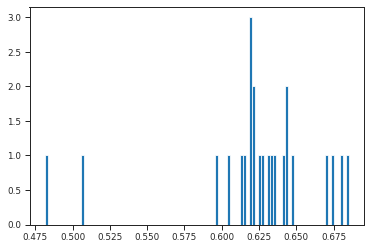

In [8]:
plt.hist(growth_ALE_d.values(), bins=100)

In [9]:
GYD_muts_df = pd.read_pickle("./data/GYD_df.pkl")
GYD_muts_df.shape

(163, 45)

In [10]:
GYD_muts_df.ale.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 34, 35])

In [11]:
geno_feat_d = {ale_num: set() for ale_num in GYD_muts_df.ale.unique()}
for i, m in GYD_muts_df.iterrows():
    for d in m["genomic features"]:
        geno_feat_d[m.ale].add(d["name"])
# geno_feat_d

From the growth data provides in the xlsx spreadsheet, ALE 19 and 20 of (passage size 0.01%) stayed in state 2.  
Ryan's paper describes 3 of these ALEs making to state 3 and the other 3 only making it to state 2.
According the Ryan's analysis files from DropBox on GYD for the 0.001% ALEs:  
ALE 1 (25): ~0.57  (3 jumps), state 3  
ALE 2 (26): ~0.45 (2 jumps), state 2  
ALE 3 (27): ~0.59 (~3 jumps), state 3  
ALE 4 (28): ~0.45 (2 jumps), state 2  
ALE 5 (29): ~0.55 (weird jump graph), state 3  
ALE 6 (30): ~0.43 (2 jumps), state 2  

In [12]:
state_2_ALE_l = [19, 20, 26, 28, 30]
for x in state_2_ALE_l:
    display(
        geno_feat_d[x]
    )

{'crr', 'yaiT'}

{'crr', 'fbaA', 'matP/ompA'}

{'cyaA', 'gntK'}

{'cyaA', 'rrlB'}

{'gspE',
 'insH-4 attenuator terminator',
 'insHp7',
 'insHp7 TSS',
 'kgtP',
 'mppA',
 'mppAp13',
 'mppAp13 TSS',
 'mppAp4',
 'mppAp4 TSS',
 'mppAp5',
 'mppAp5 TSS',
 'mppAp9',
 'mppAp9 TSS',
 'pgrR',
 'ynaI',
 'ynaI attenuator terminator',
 'ynaIp',
 'ynaIp TSS'}

In [13]:
ignore_ALE_l = [34, 35]
shared_s = geno_feat_d[1]
for k, v in geno_feat_d.items():
    if (k not in state_2_ALE_l) and (k not in ignore_ALE_l):
        shared_s = shared_s & v
        print(shared_s)
shared_s

{'yafD', 'glpK', 'cyaA', 'metL', 'rpoB'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}
{'glpK'}


{'glpK'}